In [1]:
from imports import *
from traceReader import *
%matplotlib inline

Welcome to JupyROOT 6.28/10


In [2]:
iZIP5 = 'data/FastDMC/TriggerShift/iZIP5-DMC_51241026_000000.root'

# --------------------------------------------------------------------------
# Event Number of Interest
event = 0

reader = traceReader(iZIP5)
###reader.setVerbose(True)

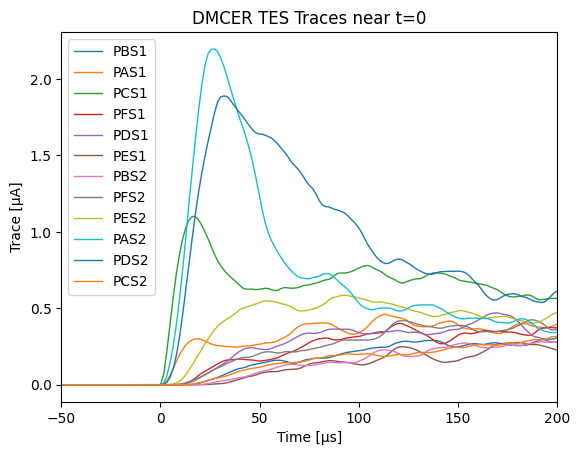

In [3]:
# Make overlay of all channels, zoomed in around t=0

bins = reader.timeBins("TES")
channels, traces = reader.plottableTES(event)

plt.plot(bins, traces, lw=1, label=channels)
plt.xlim([-50., 200.])
plt.xlabel("Time [\u03BCs]")
plt.ylabel("Trace [\u03BCA]")
plt.title("DMCER TES Traces near t=0")
plt.legend()

Text(0.5, 1.0, 'Start time of TES Traces')

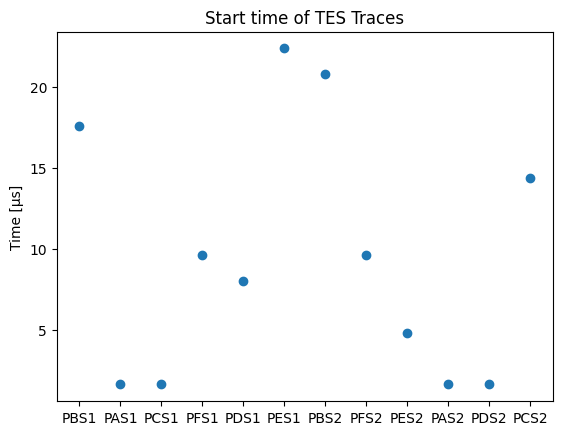

In [4]:
# Find starting time of each channel trace

bins = reader.timeBins("TES")
traces = reader.allTES(event)
channels = list(traces.keys())

tstart = [ bins[traces[ch]>1e-3][0] for ch in channels ]
plt.scatter(channels, tstart)
plt.ylabel("Time [\u03BCs]")
plt.title("Start time of TES Traces")

In [5]:
# Construct a map of trace shifts vs. hit position

# Get hit positions from g4dmcHits into a Numpy dictionary (RDF.AsNumpy())
branches = [ "EventNum", "Xdet", "Ydet", "Zdet" ]
hits = CDataFrame("G4SimDir/g4dmcHits", iZIP5).AsNumpy(branches)
hits["Rdet"] = np.sqrt(hits["Xdet"]**2 + hits["Ydet"]**2)

# Use PhononE summary use it to construct "TraceStart"
evsum = CDataFrame("G4SimDir/g4dmcEvent", iZIP5).AsNumpy(["PhononE"])
hits["TraceStart"] = np.zeros_like(evsum["PhononE"])

# Use method above to get a list of the trace shifts for a given event
for event in hits["EventNum"]:
    traces = reader.allTES(int(event))
    hits["TraceStart"][hits["EventNum"]==event] = [bins[traces[ch]>1e-3][0] for ch in channels]

# For each channel, plot time delay vs. hit position, with a detector map
fig, ax = plt.subplots(3,3, figsize=(4,4), dpi=300)
fig.set_tight_layout(True)
fig.suptitle("Trace start time on each channel")

for ich in range(len(channels)):
    # FIXME: Want a detector outline here!
    thePlot = ax.flatten()[ich]
    thePlot.scatter(hits["Xdet"],hits["Ydet"],c=hits["TraceStart"][ich],cmap='inferno')
    thePlot.set_title(channels[ich])

KeyboardInterrupt: 